In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
data_dir = "data/"
data_report_dir = "data_for_report/"

In [8]:
cv_results = pd.read_csv(data_dir + "cv_results_scaler_adam.csv")
cv_results.sort_values("mean_test_AVG_PREC", inplace=True, ascending=False)
cv_results[["param_model__architecture","mean_test_AU_PRC","std_test_AU_PRC", "mean_test_AVG_PREC","mean_test_AU_ROC","mean_train_AU_PRC", "mean_fit_time", "mean_score_time"]].head()

,param_model__architecture,mean_test_AU_PRC,std_test_AU_PRC,mean_test_AVG_PREC,mean_test_AU_ROC,mean_train_AU_PRC,mean_fit_time,mean_score_time
5,"(80,)",0.753468,0.026946,0.753859,0.954456,0.909494,165.379618,0.819181
15,"(10, 2)",0.741257,0.033139,0.739269,0.959571,0.793273,153.716931,1.631137
6,"(100,)",0.734919,0.031942,0.735495,0.958947,0.928050,152.383166,0.903873
4,"(40,)",0.732089,0.025100,0.733276,0.963999,0.883024,128.515639,0.758626
3,"(20,)",0.731237,0.026695,0.731901,0.958051,0.842199,125.279025,0.737758


In [9]:
cv_results = pd.read_csv(data_dir + "cv_results_no_scaler_adam.csv")
cv_results.sort_values("mean_test_AVG_PREC", inplace=True, ascending=False)
cv_results[["param_model__architecture", "mean_test_AU_PRC","std_test_AU_PRC", "mean_test_AVG_PREC","mean_test_AU_ROC","mean_train_AU_PRC", "mean_fit_time"]].head(5)

,param_model__architecture,mean_test_AU_PRC,std_test_AU_PRC,mean_test_AVG_PREC,mean_test_AU_ROC,mean_train_AU_PRC,mean_fit_time
3,"(20,)",0.567692,0.100835,0.570202,0.887840,0.644213,124.580594
10,"(40, 20)",0.564363,0.092236,0.565074,0.835313,0.617323,159.095275
1,"(5,)",0.537658,0.102550,0.538973,0.924664,0.561384,109.071511
12,"(20, 10)",0.564445,0.139300,0.528811,0.891480,0.607387,138.251849
4,"(40,)",0.473233,0.082825,0.473801,0.749828,0.541435,127.864411


In [10]:
cv_results = pd.read_csv(data_dir + "cv_results_scaler_SGD.csv")
cv_results.sort_values("mean_test_AVG_PREC", inplace=True, ascending=False)
cv_results[["param_model__architecture", "mean_test_AU_PRC","std_test_AU_PRC", "mean_test_AVG_PREC","mean_test_AU_ROC","mean_train_AU_PRC", "mean_fit_time"]].head()

,param_model__architecture,mean_test_AU_PRC,std_test_AU_PRC,mean_test_AVG_PREC,mean_test_AU_ROC,mean_train_AU_PRC,mean_fit_time
8,"(100, 40)",0.332332,0.035241,0.334943,0.795089,0.376445,207.142758
16,"(100, 80, 40)",0.278504,0.050111,0.280651,0.800509,0.327828,311.970602
9,"(100, 10)",0.274153,0.059448,0.276881,0.761895,0.310972,176.363929
18,"(80, 40, 20)",0.256018,0.028491,0.259435,0.837887,0.321529,251.531624
25,"(80, 60, 20, 10)",0.244174,0.054937,0.246977,0.796731,0.287568,303.930815


In [11]:
cv_results = pd.read_csv(data_dir + "cv_results_no_scaler_SGD.csv")
cv_results.sort_values("mean_test_AVG_PREC", inplace=True, ascending=False)
cv_results[["param_model__architecture", "mean_test_AU_PRC","std_test_AU_PRC", "mean_test_AVG_PREC","mean_test_AU_ROC","mean_train_AU_PRC", "mean_fit_time"]].head()

,param_model__architecture,mean_test_AU_PRC,std_test_AU_PRC,mean_test_AVG_PREC,mean_test_AU_ROC,mean_train_AU_PRC,mean_fit_time
16,"(100, 80, 40)",0.035783,0.038767,0.038324,0.605829,0.029532,310.413515
13,"(20, 5)",0.038377,0.040274,0.019551,0.639889,0.011127,136.245752
2,"(10,)",0.014077,0.010557,0.014509,0.869851,0.010621,124.896446
24,"(100, 50, 25, 10)",0.013370,0.024249,0.013578,0.570834,0.019196,286.234335
21,"(20, 10, 5)",0.008019,0.009634,0.011698,0.535337,0.012053,166.503101


# Clean data for report

In [4]:
relevant_columns = ["param_model__architecture", 
                    "mean_test_AU_PRC", "std_test_AU_PRC",
                    "mean_test_AVG_PREC","std_test_AVG_PREC", "mean_test_AU_ROC","std_test_AU_ROC",
                    "mean_train_AU_PRC","std_train_AU_PRC", "mean_train_AVG_PREC", 
                    "mean_train_AU_ROC","mean_fit_time"]
for file in os.listdir(data_dir):
    if file.startswith("cv") and "for_report" not in file:
        df = pd.read_csv(data_dir + file)
        df = df[relevant_columns]
        df = df.sort_values("mean_test_AVG_PREC", ascending=False)
        df = df.round(3)
        df = df.rename(lambda x: x.replace("_", ""), axis=1)
        df = df.rename(lambda x: x.replace("parammodelarchitecture", "architecture"), axis=1)
        df.architecture = df.architecture.apply(lambda x: x.replace("(", ""))
        df.architecture = df.architecture.apply(lambda x: x.replace(")", ""))
        df.architecture = df.architecture.apply(lambda x: x.replace(",", "") if x[-1] == "," else x)
        df.architecture = df.architecture.apply(lambda x: x.replace(", ", "-"))
        df.to_csv(data_report_dir + file.split(".")[0] + "_for_report.csv", index=False)

# Make some relevant plots

In [18]:
def get_optimizer_name(string):
    if "SGD" in string:
        return "SGD"
    else: 
        return "Adam"
    
def get_scaling_active(string):
    if "no_scaler" in string:
        return "no scaling"
    else:
        return "scaling"

In [19]:
df_list = []

optimizer_column_name = "optimizer"
scaling_column_name = "scaling"
relevant_columns = ["architecture", "mean_test_AVG_PREC", "mean_train_AVG_PREC", "std_test_AVG_PREC","std_test_AU_PRC", optimizer_column_name, scaling_column_name]
for file in os.listdir(data_dir):
    if file.startswith("cv") and "for_report" not in file and "gpu" not in file:
        df = pd.read_csv(data_dir + file)
        df = df.assign(**{optimizer_column_name: get_optimizer_name(file)})
        df = df.assign(**{scaling_column_name: get_scaling_active(file)})
        df = df.rename(lambda x: x.replace("param_model__architecture", "architecture"), axis=1)

        df_list.append(df[relevant_columns])
super_df = pd.concat(df_list)
super_df = super_df.sort_values("mean_test_AVG_PREC", ascending=False)

In [20]:
top_5_adam_scaling = pd.read_csv(data_dir + "cv_results_scaler_adam.csv")
top_5_adam_scaling.sort_values("mean_test_AVG_PREC", inplace=True, ascending=False)
top_5_adam_scaling = top_5_adam_scaling.head().param_model__architecture

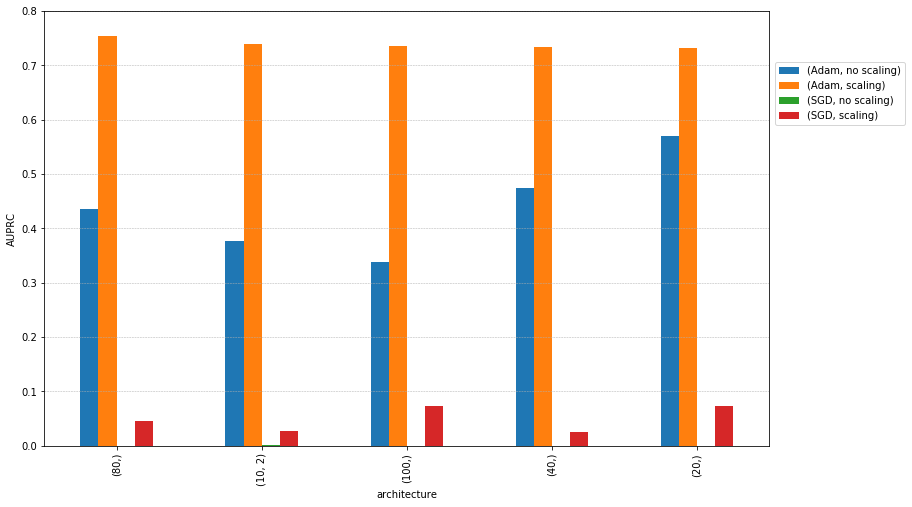

In [21]:
ax = super_df.pivot_table(index="architecture", columns=["optimizer", "scaling"], values="mean_test_AVG_PREC").round(3).loc[top_5_adam_scaling].plot(kind="bar",figsize=(13,8))
ax.yaxis.grid(linestyle="dashed", linewidth=0.5)
ax.yaxis.set_ticks(np.linspace(0,0.80,9))
ax.legend(bbox_to_anchor=(1.05, 0.8), bbox_transform=plt.gcf().transFigure)
ax.set_ylabel("AUPRC")
plt.show()

In [22]:
super_df = super_df.reset_index()

In [23]:
indexes = super_df.groupby(["optimizer", "scaling"]).agg({"mean_test_AVG_PREC":["max", "idxmax"]}).mean_test_AVG_PREC["idxmax"].values

In [24]:
super_df.iloc[indexes]

,index,architecture,mean_test_AVG_PREC,mean_train_AVG_PREC,std_test_AVG_PREC,std_test_AU_PRC,optimizer,scaling
26,3,"(20,)",0.570202,0.644732,0.100839,0.100835,Adam,no scaling
0,5,"(80,)",0.753859,0.909518,0.026856,0.026946,Adam,scaling
64,16,"(100, 80, 40)",0.038324,0.030258,0.040989,0.038767,SGD,no scaling
36,8,"(100, 40)",0.334943,0.377106,0.035116,0.035241,SGD,scaling


Text(0, 0.5, 'mean test AUPRC')

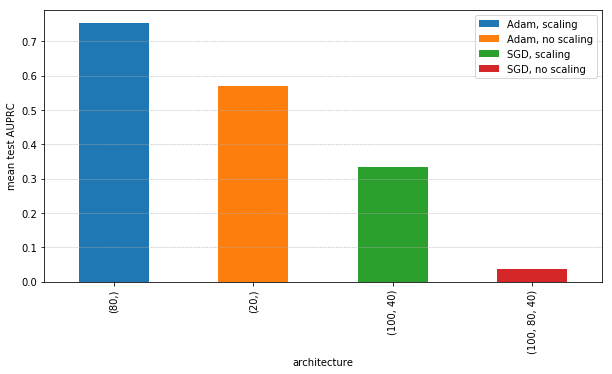

In [25]:
ax = super_df.iloc[indexes].sort_values("mean_test_AVG_PREC", ascending=False).rename({"mean_test_AVG_PREC": "mean test AUPRC"}, axis=1).plot.bar("architecture", "mean test AUPRC", figsize=(10,5), legend=False)
ax.get_children()[0].set_label("Adam, scaling")
ax.get_children()[1].set_label("Adam, no scaling")
ax.get_children()[2].set_label("SGD, scaling")
ax.get_children()[3].set_label("SGD, no scaling")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4])
ax.yaxis.grid(linestyle="dashed", linewidth=0.5)
ax.set_ylabel("mean test AUPRC")

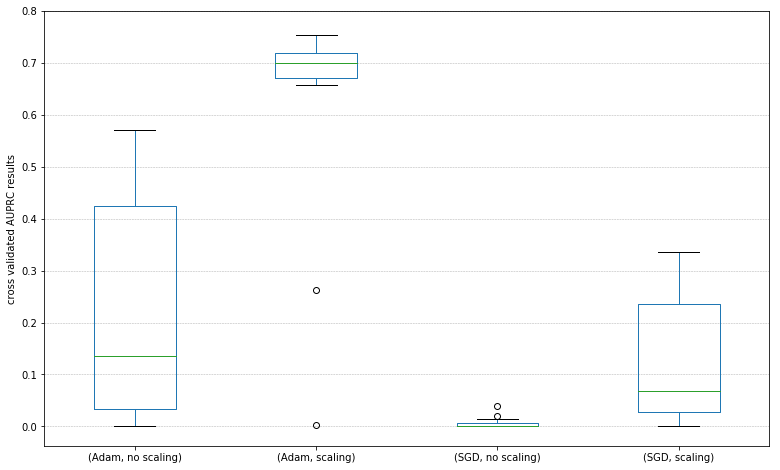

In [26]:
ax = super_df.pivot_table(index="architecture", columns=["optimizer", "scaling"], values="mean_test_AVG_PREC").boxplot(figsize=(13,8), grid=False)
ax.yaxis.grid(linestyle="dashed", linewidth=0.5)
ax.yaxis.set_ticks(np.linspace(0,0.8,9))
ax.set_ylabel("cross validated AUPRC results")
plt.show()

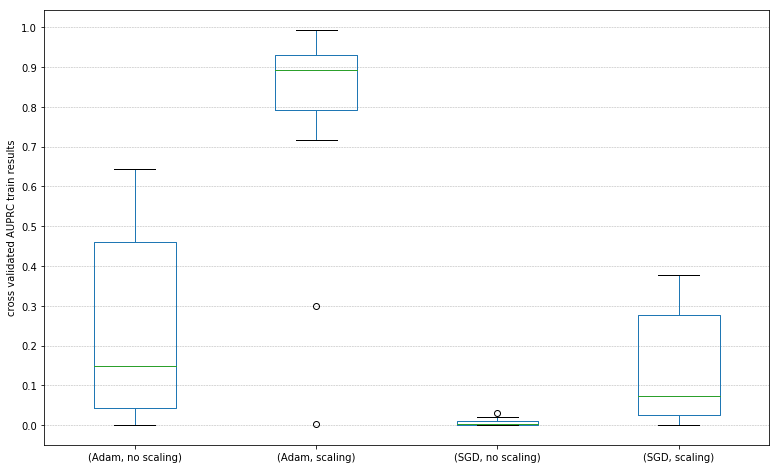

In [28]:
ax = super_df.pivot_table(index="architecture", columns=["optimizer", "scaling"], values="mean_train_AVG_PREC").boxplot(figsize=(13,8), grid=False)
ax.yaxis.grid(linestyle="dashed", linewidth=0.5)
ax.yaxis.set_ticks(np.linspace(0,1,11))
ax.set_ylabel("cross validated AUPRC train results")
plt.show()

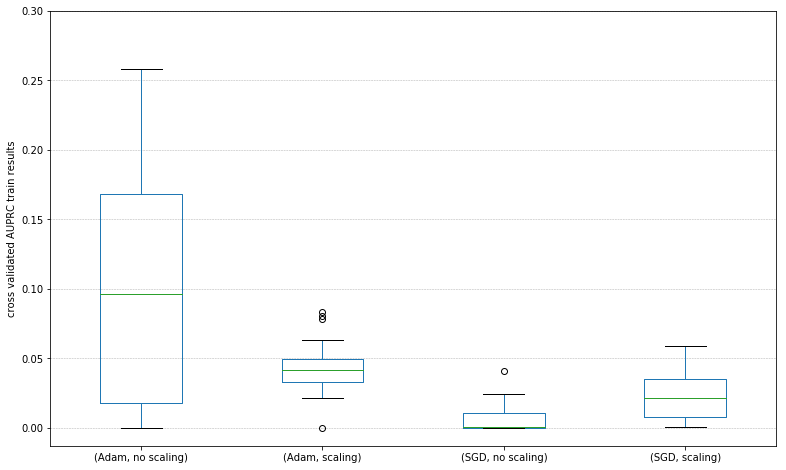

In [37]:
ax = super_df.pivot_table(index="architecture", columns=["optimizer", "scaling"], values="std_test_AVG_PREC").boxplot(figsize=(13,8), grid=False)
ax.yaxis.grid(linestyle="dashed", linewidth=0.5)
ax.yaxis.set_ticks(np.linspace(0,0.3,7))
ax.set_ylabel("cross validated AUPRC train results")
plt.show()